# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import numpy as np
import pandas as pd
import json
import requests
import tweepy
import os
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [2]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
tweet_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    data_json = json.load(json_file)
    for each_tweet in data_json:
        tweet_id = each_tweet['id']
        whole_tweet = each_tweet['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_tweet['favorite_count']
        retweet_count = each_tweet['retweet_count']
        created_at = each_tweet['created_at']
        whole_source = each_tweet['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_tweet['retweeted_status'] = each_tweet.get('retweeted_status', 'Original tweet')
        tweet_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status'])

In [6]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 6 columns):
tweet_id            2340 non-null object
favorite_count      2340 non-null int64
retweet_count       2340 non-null int64
created_at          2340 non-null object
source              2340 non-null object
retweeted_status    2340 non-null object
dtypes: int64(2), object(4)
memory usage: 109.8+ KB


In [7]:
print('Number of tweets successfully downloaded: ', len(archive))

Number of tweets successfully downloaded:  2356


In [8]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
archive.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,8.924210e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,8.921770e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,8.918150e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,8.916900e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,8.913280e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
archive.duplicated().sum()

0

In [11]:
archive.shape

(2356, 17)

In [12]:
archive.isnull().values.any()

True

In [13]:

archive.isnull().sum().sum()

11140

In [14]:
prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [16]:
prediction.duplicated().sum()

0

In [17]:
prediction.shape

(2075, 12)

In [18]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status
0,892420643555336193,37993,8303,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet
1,892177421306343426,32619,6134,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet
2,891815181378084864,24550,4061,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet
3,891689557279858688,41333,8446,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet
4,891327558926688256,39516,9150,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet


In [19]:
tweet_json.tail()

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status
2335,666049248165822465,106,42,Mon Nov 16 00:24:50 +0000 2015,Twitter for iPhone,Original tweet
2336,666044226329800704,293,139,Mon Nov 16 00:04:52 +0000 2015,Twitter for iPhone,Original tweet
2337,666033412701032449,123,43,Sun Nov 15 23:21:54 +0000 2015,Twitter for iPhone,Original tweet
2338,666029285002620928,124,47,Sun Nov 15 23:05:30 +0000 2015,Twitter for iPhone,Original tweet
2339,666020888022790149,2529,500,Sun Nov 15 22:32:08 +0000 2015,Twitter for iPhone,Original tweet


In [20]:
tweet_json.shape

(2340, 6)

### Quality issues
1. Too many nan values in archive dataset

2. Datatype mismatch

3. Missing values

4. Records with more than one dog stage

5. Errors in dog names

6. Text column error

7. Some name colums doesnot contain real names

8. Remove retweets

### Tidiness issues
1. Merge the three datasets

2.Merge dog stage columns into one

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [60]:
# Make copies of original pieces of data
archive_two=archive.copy()
prediction_two= prediction.copy()
tweet_json_two= tweet_json.copy()

### Issue #1: To many unwanted columns because they contain too many Nan

#### Define: Remove unwanted columns

In [22]:
archive_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null float64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(5), int64(2), 

#### Code

In [23]:
archive_two=archive_two.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'],1)

#### Test

In [24]:
archive_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null float64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 221.0+ KB


### Issue #2: Datatype mismatch 

#### Define datatypes mismatch correction

#### Code

In [25]:
archive_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null float64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 221.0+ KB


In [72]:
archive_two.timestamp=pd.to_datetime(archive_two.timestamp)
archive_two.tweet_id = archive_two.tweet_id.astype(str)
prediction_two.tweet_id = prediction_two.tweet_id.astype(str)
tweet_json_two.tweet_id = tweet_json_two.tweet_id.astype(str)

#### Test

In [27]:
archive_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 221.0+ KB


incorrect dog names

In [28]:
archive_two.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [29]:
archive_two['name'][archive_two['name'].str.match('[a-z] +')]='None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
archive_two.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Cooper          11
Oliver          11
Lola            10
Tucker          10
Penny           10
Winston          9
Bo               9
Sadie            8
the              8
Daisy            7
Toby             7
Buddy            7
an               7
Bailey           7
Bella            6
Scout            6
Oscar            6
Koda             6
Milo             6
Leo              6
Jax              6
Rusty            6
Dave             6
Stanley          6
Jack             6
very             5
              ... 
Carper           1
Tripp            1
Ron              1
Shikha           1
Cheesy           1
Newt             1
Coopson          1
Mingus           1
Chevy            1
Ben              1
Callie           1
Tess             1
Fiji             1
Ike              1
Beya             1
Claude           1
Gunner           1
Saydee           1
infuriating      1
Alexander        1
Julius           1
Spanky      

In [31]:
archive_two['name'] = archive_two.name.str.extract('\\b([A-Z]\\S*)\\b')


In [32]:
archive_two.dropna(subset=['name'], inplace=True)

In [33]:
# Drop any remaining rows that contain None in the name column
archive_two = archive_two[archive_two.name != 'None']

In [34]:
archive_two['add_all']=archive_two.doggo+archive_two.floofer+archive_two.pupper+archive_two.puppo

In [35]:
archive_two['name'].value_counts()

Charlie      12
Cooper       11
Oliver       11
Lucy         11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
Sadie         8
Buddy         7
Bailey        7
Toby          7
Daisy         7
Dave          6
Stanley       6
Jack          6
Jax           6
Leo           6
Scout         6
Bella         6
Oscar         6
Rusty         6
Koda          6
Milo          6
Bentley       5
Sunny         5
Alfie         5
Sammy         5
Finn          5
             ..
Ron           1
Shikha        1
Cheesy        1
Jazzy         1
Alejandro     1
Newt          1
Mingus        1
Ito           1
Saydee        1
Bodie         1
Ben           1
Callie        1
Tess          1
Fiji          1
Ike           1
Beya          1
Claude        1
Gunner        1
Chevy         1
Ralph         1
Jaycob        1
Julius        1
Spanky        1
Jareld        1
Clifford      1
Binky         1
Mo            1
Chesney       1
Geoff         1
Farfle        1
Name: name, Length: 931,

# Define; Remove HTML from rows in source column

In [36]:

archive_two['source'] = archive_two['source'].str.replace(
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')

archive_two['source'] = archive_two['source'].str.replace(
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')

archive_two['source'] = archive_two['source'].str.replace(
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')

archive_two['source'] = archive_two['source'].str.replace( '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')



# Test

In [37]:
archive_two.source.value_counts()

Twitter for iPhone    1436
Vine                    41
Twitter Web Client      16
TweetDeck                9
Name: source, dtype: int64

# Extract the dog stage names from the the 4 individual columns and combine into one 'stage' column

In [39]:
archive_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 13 columns):
tweet_id              1502 non-null object
timestamp             1502 non-null datetime64[ns]
source                1502 non-null object
text                  1502 non-null object
expanded_urls         1502 non-null object
rating_numerator      1502 non-null int64
rating_denominator    1502 non-null int64
name                  1502 non-null object
doggo                 1502 non-null object
floofer               1502 non-null object
pupper                1502 non-null object
puppo                 1502 non-null object
add_all               1502 non-null object
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 164.3+ KB


In [40]:

# https://stackoverflow.com/questions/44061607/pandas-lambda-function-with-nan-support

stages = ['doggo', 'floofer', 'pupper', 'puppo']
for stage in stages:
    archive_two[stage] = archive_two[stage].apply(lambda x: np.NaN if x == 'None' else x)
    
archive_two['stage'] = archive_two[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).sum(1)
archive_two['stage'] = archive_two['stage'].apply(lambda x: x.replace('nan', ''))
archive_two['stage'] = archive_two['stage'].apply(lambda x: np.NaN if x == '' else x)

archive_two['stage'].replace({'doggopupper':'doggo pupper', 
                                'doggofloofer':'doggo floofer',
                                'doggopuppo':'doggo puppo',
                                '':None}, inplace=True)

In [41]:
cols_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']
archive_two.drop(cols_to_drop, axis=1, inplace=True)

# Test

In [43]:
archive_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 10 columns):
tweet_id              1502 non-null object
timestamp             1502 non-null datetime64[ns]
source                1502 non-null object
text                  1502 non-null object
expanded_urls         1502 non-null object
rating_numerator      1502 non-null int64
rating_denominator    1502 non-null int64
name                  1502 non-null object
add_all               1502 non-null object
stage                 204 non-null object
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 129.1+ KB


#  remove columns with no image

In [44]:
prediction = prediction.drop_duplicates(subset='jpg_url')

# Test

In [45]:
len(prediction[prediction.jpg_url.duplicated()])

0

# Define: remove retweets

In [45]:
tweet_json_two = tweet_json_two[tweet_json_two.retweeted_status == 'Original tweet']

# Test

In [46]:
tweet_json_two.retweeted_status.value_counts()

Original tweet    2173
Name: retweeted_status, dtype: int64

In [47]:
archive_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 9 columns):
tweet_id              1502 non-null object
timestamp             1502 non-null datetime64[ns]
source                1502 non-null object
text                  1502 non-null object
expanded_urls         1502 non-null object
rating_numerator      1502 non-null int64
rating_denominator    1502 non-null int64
name                  1502 non-null object
add_all               1502 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 117.3+ KB


In [48]:
prediction_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [49]:
tweet_json_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2339
Data columns (total 6 columns):
tweet_id            2173 non-null object
favorite_count      2173 non-null int64
retweet_count       2173 non-null int64
created_at          2173 non-null object
source              2173 non-null object
retweeted_status    2173 non-null object
dtypes: int64(2), object(4)
memory usage: 118.8+ KB


In [43]:
archive_two['stage'].value_counts()

pupper           245
doggo             83
puppo             29
doggo pupper      12
floofer            9
doggo puppo        1
doggo floofer      1
Name: stage, dtype: int64

# combine all three datasets

In [74]:
archive_two = pd.merge( left=archive_two, right=prediction_two, how='left',on='tweet_id')


In [75]:
# Merge the tweet_json table into the combined_archive data frame
archive_two = pd.merge(left=archive_two,right= tweet_json_two,how='left', on='tweet_id')

In [76]:
archive_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 44 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source_x                      2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url_x              

In [65]:
archive_two.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,8.924210e+17,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8.921770e+17,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.918150e+17,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8.916900e+17,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.913280e+17,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [77]:
archive_two.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

# Most used twitter source

In [78]:
twitter_archive_master=pd.read_csv('twitter_archive_master.csv')

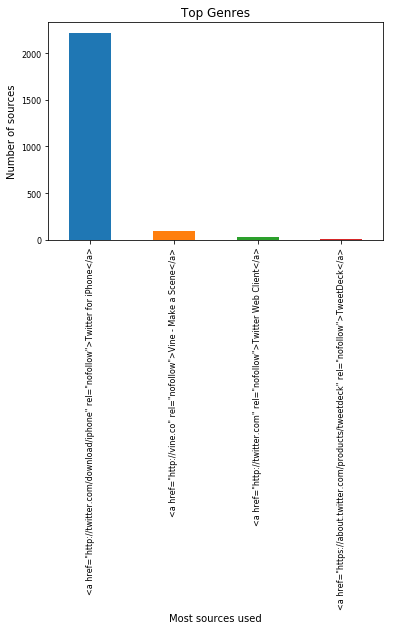

In [70]:
diagram = source.plot.bar(fontsize = 8)
# Set a title
diagram.set(title = 'Top Genres')
# x-label and y-label
diagram.set_xlabel('Most sources used')
diagram.set_ylabel('Number of sources')
# Show the plot
plt.show()

In [41]:
 # Find the total occurrences of each dog name in the cleaned combined_archive dataframe
archive_two.name.value_counts()


Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Lola         10
Penny        10
Bo            9
Winston       9
Sadie         8
Toby          7
Daisy         7
Buddy         7
Bailey        7
Jax           6
Koda          6
Jack          6
Scout         6
Milo          6
Oscar         6
Leo           6
Bella         6
Rusty         6
Dave          6
Stanley       6
Finn          5
Oakley        5
Phil          5
Louis         5
George        5
             ..
Zooey         1
Tripp         1
Carbon        1
Loomis        1
Marq          1
Dobby         1
Snoop         1
Karl          1
Benny         1
Rumpole       1
Acro          1
Maxwell       1
Ricky         1
Barclay       1
Ester         1
Kody          1
Ralpher       1
Wafer         1
Dex           1
Heinrich      1
Naphaniel     1
Brat          1
Kota          1
Blue          1
Reagan        1
Mitch         1
Ambrose       1
Henry         1
Ridley        1
Clifford      1
Name: name, Length: 931,

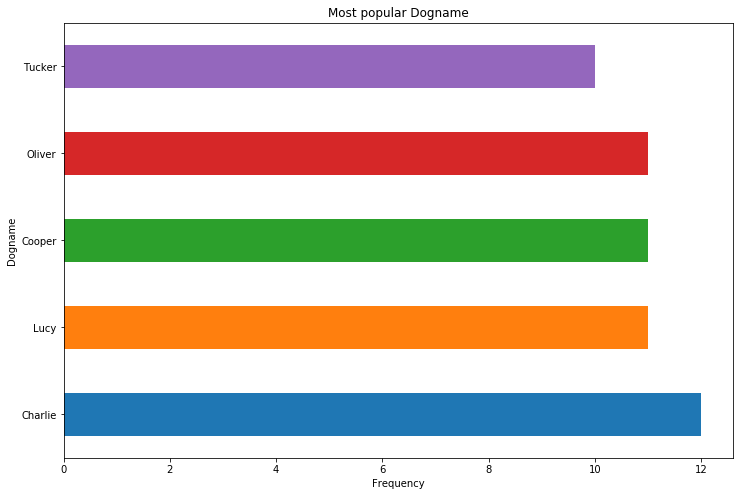

In [60]:
plt.figure(figsize=(12, 8))
diagram = archive_two.name.value_counts().nlargest(5).plot(kind = 'barh');

# Set a title
diagram.set(title = 'Most popular Dogname')
# x-label and y-label
diagram.set_xlabel('Frequency')
diagram.set_ylabel('Dogname')
# Show the plot
plt.show()

### Insights:
1. Charlie is the most popular dog name

2.iphone is the most popular source

3.floofer is the least popular dogname